<a href="https://colab.research.google.com/github/donhaklee/AIProject1/blob/main/ml%EA%B3%B5%EB%B6%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

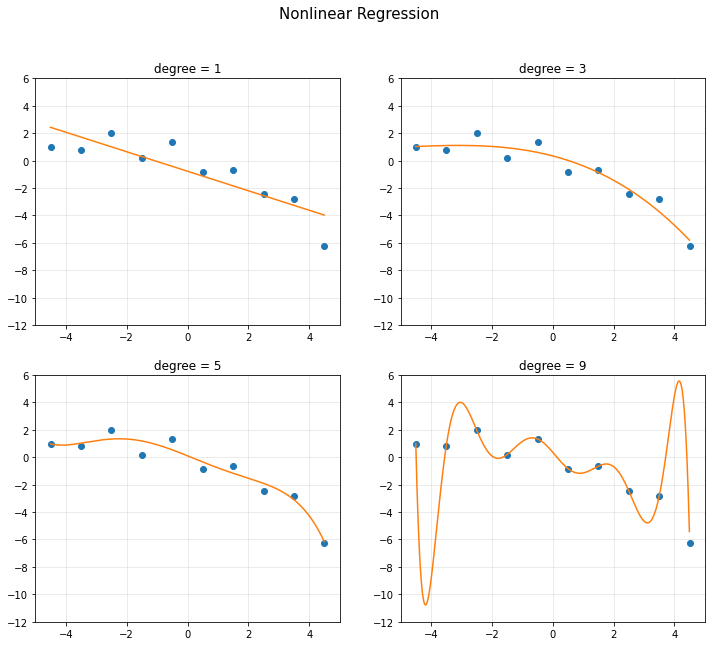

In [ ]:
# 과적합efwfafwfwfwf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
x = np.linspace(-4.5, 4.5, 10).reshape(-1,1)
y = np.array([0.9819,0.7973,1.9737,0.1838,1.3180,-0.8361,
              -0.6591,-2.4701,-2.8122,-6.2512]).reshape(-1,1)

d = [1,3,5,9]
RSS = []
plt.figure(figsize = (12,10))
plt.suptitle('Nonlinear Regression', fontsize = 15)

for k in range(4):
  xp = np.arange(-4.5,4.5,0.01).reshape(-1,1)
  yp = theta[0,0] + theta[1,0]*xp
  A = np.hstack([x**i for i in range(d[k]+1)])
  polybasis = np.hstack([xp**i for i in range(d[k]+1)])

  A = np.asmatrix(A)
  polybasis = np.asmatrix(polybasis)

  theta = (A.T*A).I*A.T*y
  yp = polybasis*theta

  RSS.append(np.linalg.norm(y-A*theta, 2)**2)

  plt.subplot(2,2,k+1)
  plt.plot(x,y,'o')
  plt.plot(xp,yp)
  plt.axis([-5,5,-12,6])
  plt.title('degree = {}'.format(d[k]))
  plt.grid(alpha=0.3)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


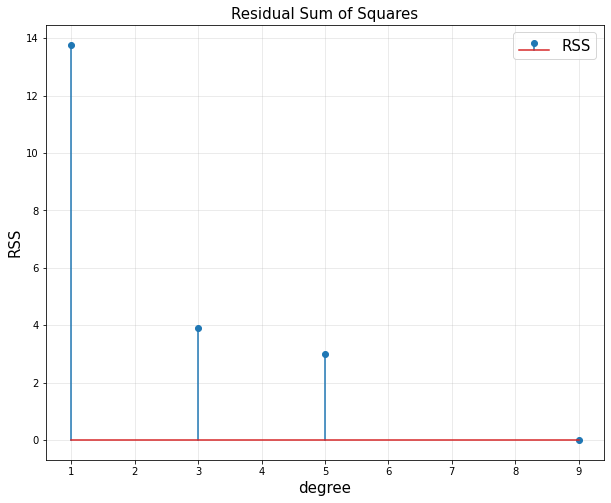

In [ ]:
plt.figure(figsize = (10,8))
plt.stem(d, RSS, label = 'RSS')
plt.title('Residual Sum of Squares', fontsize = 15)
plt.xlabel('degree',fontsize = 15)
plt.ylabel('RSS', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

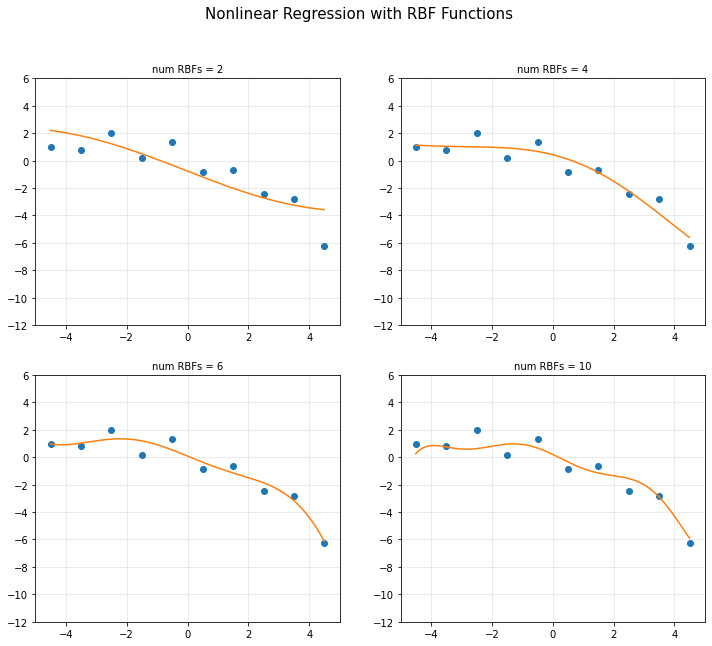

In [ ]:
xp = np.arange(-4.5,4.5,0.01).reshape(-1,1)
d = [2,4,6,10]
plt.figure(figsize = (12,10))
sigma = 5

for k in range(4):
  u = np.linspace(-4.5,4.5,d[k])
  A = np.hstack([np.exp(-(x - u[i])**2/(2*sigma**2)) for i in range(d[k])])

  rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d[k])])
  A = np.asmatrix(A)
  rbfbasis = np.asmatrix(rbfbasis)

  theta = (A.T*A).I*A.T*y
  yp = rbfbasis*theta
  plt.subplot(2,2,k+1)
  plt.plot(x,y,'o')
  plt.plot(xp,yp)
  plt.axis([-5,5,-12,6])
  plt.title('num RBFs = {}'.format(d[k]),fontsize = 10)
  plt.grid(alpha = 0.3)

plt.suptitle('Nonlinear Regression with RBF Functions', fontsize = 15)
plt.show()

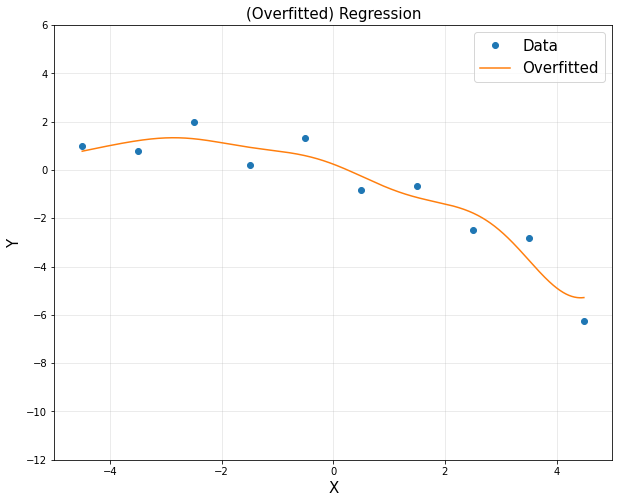

In [ ]:
# Regularization, CVXPY code
import cvxpy as cvx

d = 10
u = np.linspace(-4.5, 4.5, d)
sigma = 1

rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])
A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])

rbfbasis = np.asmatrix(rbfbasis)
A = np.asmatrix(A)

lamb = 0.1
theta = cvx.Variable([d,1])
obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + lamb*cvx.sum_squares(theta))
prob = cvx.Problem(obj, []).solve()

yp = rbfbasis*theta.value
plt.figure(figsize = (10,8))
plt.plot(x,y,'o',label = 'Data')
plt.plot(xp,yp,label = 'Overfitted')
plt.title('(Overfitted) Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5,5,-12,6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


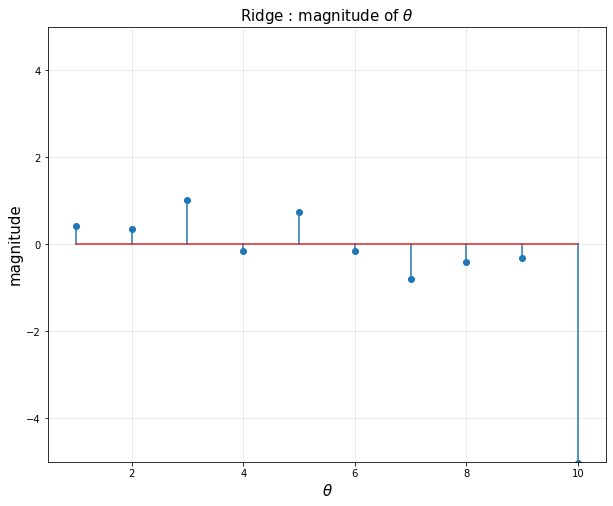

In [ ]:
plt.figure(figsize = (10,8))
plt.title(r'Ridge : magnitude of $\theta$', fontsize = 15)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel('magnitude', fontsize = 15)
plt.stem(np.linspace(1,10,10).reshape(-1,1), theta.value)
plt.xlim([0.5,10.5])
plt.ylim([-5,5])
plt.grid(alpha = 0.3)
plt.show()

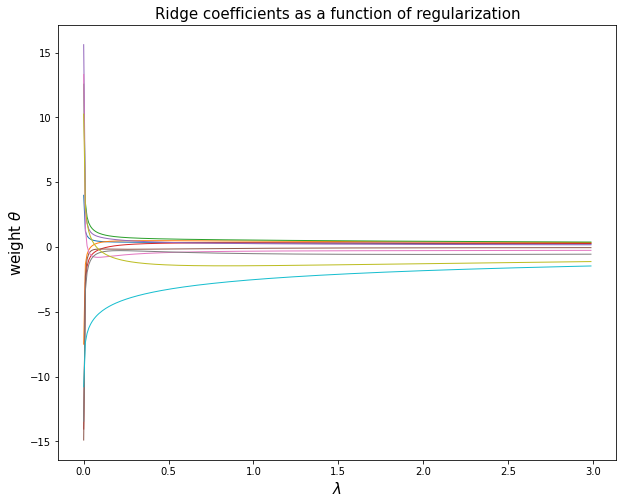

In [ ]:
lamb = np.arange(0,3,0.01)
theta_record = []
for k in lamb:
  theta = cvx.Variable([d,1])
  obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + k*cvx.sum_squares(theta))
  prob = cvx.Problem(obj).solve()
  theta_record.append(np.ravel(theta.value))
plt.figure(figsize = (10,8))
plt.plot(lamb,theta_record,linewidth = 1)
plt.title('Ridge coefficients as a function of regularization', fontsize = 15)
plt.xlabel('$\lambda$', fontsize = 15)
plt.ylabel(r'weight $\theta$', fontsize = 15)
plt.show()

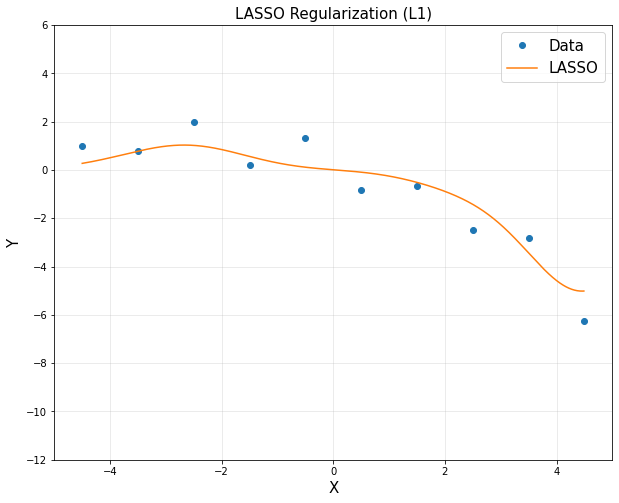

In [ ]:
# LASSO
lamb = 2
theta = cvx.Variable([d,1])
obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + lamb*cvx.norm(theta, 1))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value
plt.figure(figsize = (10,8))
plt.title('LASSO Regularization (L1)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x,y,'o',label = 'Data')
plt.plot(xp,yp,label='LASSO')
plt.axis([-5,5,-12,6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


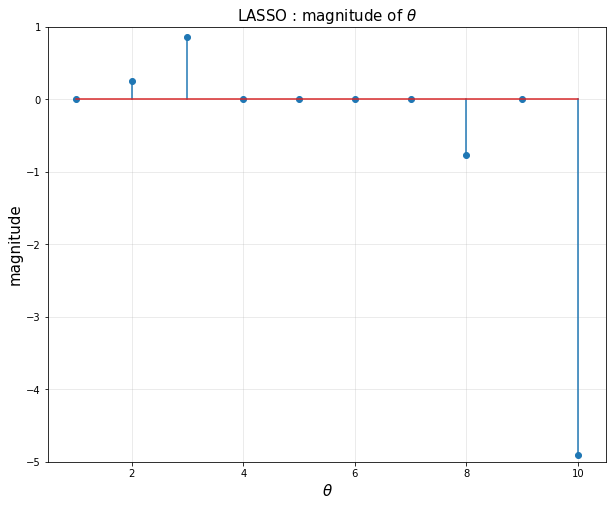

In [ ]:
plt.figure(figsize = (10,8))
plt.title(r'LASSO : magnitude of $\theta$', fontsize = 15)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel('magnitude', fontsize = 15)
plt.stem(np.arange(1,11),theta.value)
plt.xlim([0.5,10.5])
plt.ylim([-5,1])
plt.grid(alpha = 0.3)
plt.show()

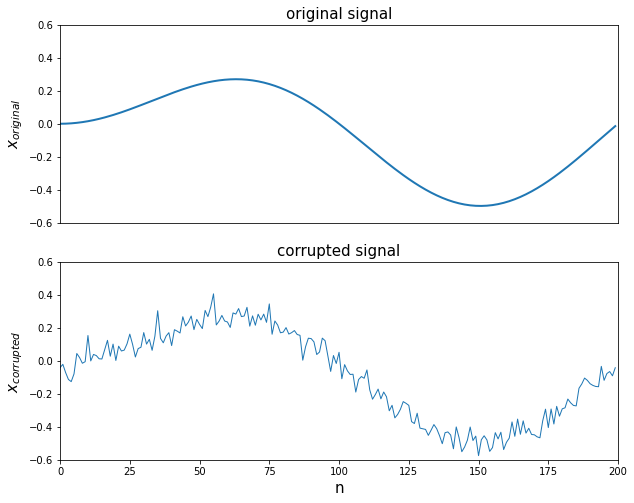

In [ ]:
# De-noising Signal
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

%matplotlib inline

n = 200
t = np.arange(n).reshape(-1,1)
x = 0.5 * np.sin((2*np.pi/n)*t)*(np.sin(0.01*t))
x_cor = x + 0.05*np.random.randn(n,1)

plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(t,x,'-',linewidth = 2)
plt.axis([0,n,-0.6,0.6])
plt.xticks([])
plt.title('original signal', fontsize = 15)
plt.ylabel('$x_{original}$', fontsize = 15)
plt.subplot(2,1,2)
plt.plot(t, x_cor,'-', linewidth = 1)
plt.axis([0,n,-0.6,0.6])
plt.title('corrupted signal', fontsize = 15)
plt.xlabel('n',fontsize = 15)
plt.ylabel('$x_{corrupted}$', fontsize = 15)
plt.show()

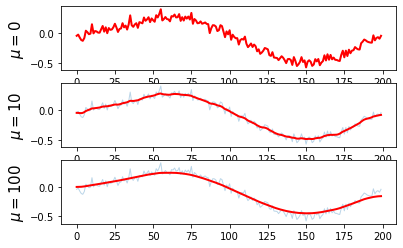

In [ ]:
mu = [0,10,100];
D = np.zeros([n-1,n])
D[:,0:n-1] = D[:,0:n-1] - np.eye(n-1)
D[:,1:n] = D[:,1:n] + np.eye(n-1)

for i in range(len(mu)):
  A = np.vstack([np.eye(n), np.sqrt(mu[i])*D])
  b = np.vstack([x_cor, np.zeros([n-1,1])])

  A = np.asmatrix(A)
  b = np.asmatrix(b)
  x_reconst = (A.T*A).I*A.T*b

  plt.subplot(3,1,i+1)
  plt.plot(t, x_cor, '-', linewidth = 1, alpha = 0.3)
  plt.plot(t, x_reconst, 'r', linewidth = 2)
  plt.ylabel('$\mu = {}$'.format(mu[i]), fontsize = 15)
plt.show()
# CVXPY
'''
mu = 100
x_reconst = cvx.Variable([n,1])
obj = cvx.Minimize(cvx.sum_squares(x_reconst - x_cor) + mu*cvx.sum_squares(D*x_reconst))
prob = cvx.Problem(obj).solve()

plt.figure(figsize = (10,4))
plt.plot(t, x_cor, '-', linewidth = 1, alpha = 0.3, label = 'corrupted');
plt.plot(t, x_reconst.value, 'r', linewidth = 2, label = 'reconstructed')
plt.title('$\mu = {}$'.format(mu), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()
'''

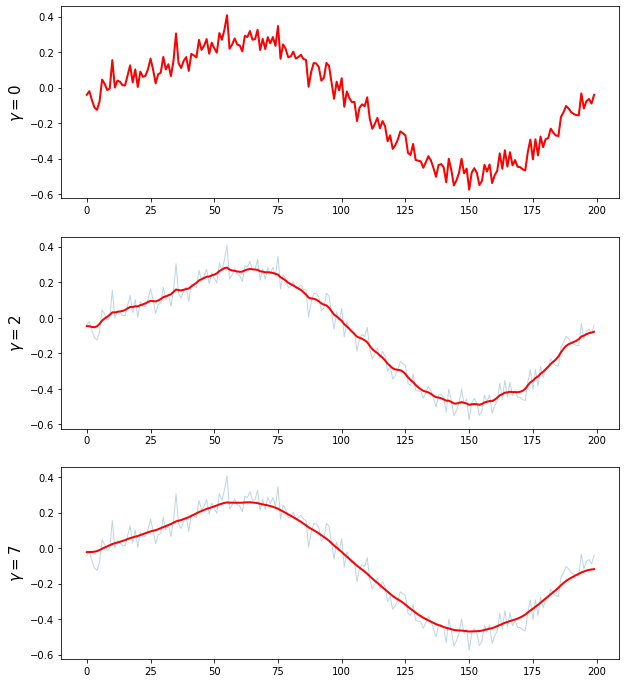

In [ ]:
# L2norm
plt.figure(figsize = (10,12))
gammas = [0,2,7]
for i in range(len(gammas)):
  x_reconst = cvx.Variable([n,1])
  obj = cvx.Minimize(cvx.norm(x_reconst - x_cor, 2) + gammas[i]*cvx.norm(D*x_reconst, 2))
  '''
  제약조건 L2norm
  beta = 0.8
  obj = cvx.Minimize(cvx.norm(D*x_reconst, 2))
  const = [cvx.norm(x_reconst - x_cor, 2) <= beta]
  plt.figure(figsize = (10,4))
  '''
  prob = cvx.Problem(obj).solve()
  plt.subplot(3,1,i+1)
  plt.plot(t,x_cor,'-', linewidth = 1, alpha = 0.3)
  plt.plot(t,x_reconst.value, 'r', linewidth = 2)
  plt.ylabel('$ \gamma = {}$'.format(gammas[i]),fontsize = 15)
plt.show()

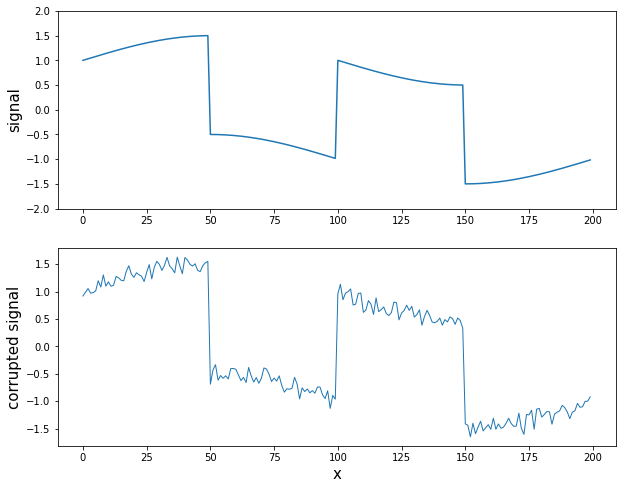

In [ ]:
# Signal with sharp Transition + Noise
n = 200
t = np.arange(n).reshape(-1,1)
exact = np.vstack([np.ones([50,1]), -np.ones([50,1]), np.ones([50,1]), -np.ones([50,1])])
x = exact + 0.5*np.sin((2*np.pi/n)*t)
x_cor = x + 0.1*np.random.randn(n,1)
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(t,x)
plt.ylim([-2.0,2.0])
plt.ylabel('signal', fontsize = 15)
plt.subplot(2,1,2)
plt.plot(t, x_cor, linewidth = 1)
plt.ylabel('corrupted signal', fontsize =15)
plt.xlabel('x', fontsize = 15)
plt.show()

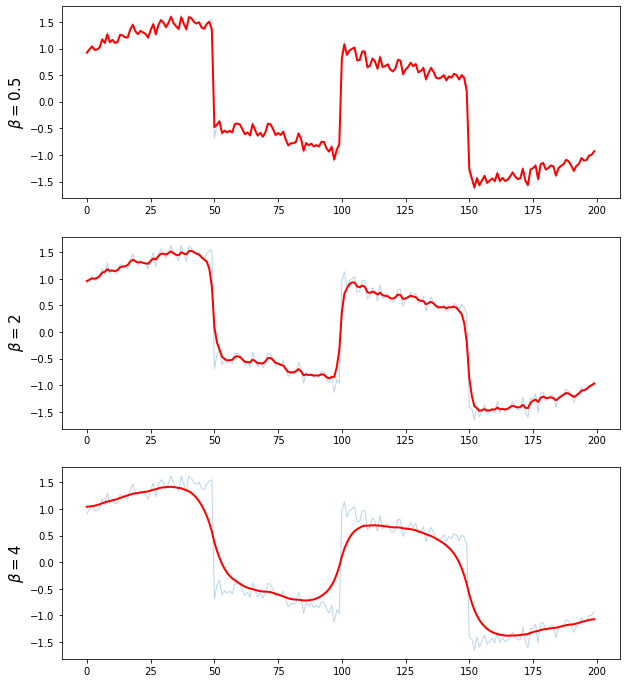

In [ ]:
# L2norm
plt.figure(figsize = (10,12))
beta = [0.5,2,4]
for i in range(len(beta)):
  x_reconst = cvx.Variable([n,1])
  obj = cvx.Minimize(cvx.norm(x_reconst[1:n] - x_reconst[0:n-1],2))
  const = [cvx.norm(x_reconst - x_cor, 2) <= beta[i]]
  prob = cvx.Problem(obj,const).solve()
  plt.subplot(len(beta), 1, i+1)
  plt.plot(t,x_cor, linewidth = 1, alpha = 0.3)
  plt.plot(t,x_reconst.value, 'r', linewidth = 2)
  plt.ylabel(r'$\beta = {}$'.format(beta[i]), fontsize = 15)
plt.show()

In [ ]:
# 사진 뿌옇게
import cv2
imbw = cv2.imread('경로',0)
row = 150
col = 150
resized_imbw = cv2.resize(imbw,(row, col))
plt.figure(figsize = (8,8))
plt.imshow(resized_imbw,'gray')
plt.axis('off')
plt.show()

n = row*col
imbws = resized_imbw.reshape(-1,1)
beta = 1500
x = cvx.Variable([n,1])
obj = cvx.Minimize(cvx.norm(x[1:n] - x[0:n-1],1))
const = [cvx.norm(x - imbws,2) <= beta]
prob = cvx.Problem(obj, const).solve()
imbwr = x.value.reshape(row, col)
plt.figure(figsize = (8,8))
plt.imshow(imbwr, 'gray')
plt.axis('off')
plt.show()